<a href="https://colab.research.google.com/github/AtrCheema/AI4Water/blob/dev/examples/paper_figs/hru_discretization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    import ai4water
except ImportError:
    print("Cloning the repository and add it to the path")
    !git clone -b dev https://github.com/AtrCheema/AI4Water.git
    import os
    import site
    site.addsitedir(os.path.join(os.getcwd(), 'AI4Water'))
    import ai4water

Cloning the repository and add it to the path
Cloning into 'AI4Water'...
remote: Enumerating objects: 4422, done.
remote: Counting objects: 100% (1116/1116), done.
remote: Compressing objects: 100% (776/776), done.
remote: Total 4422 (delta 659), reused 581 (delta 336), pack-reused 3306
Receiving objects: 100% (4422/4422), 33.59 MiB | 22.12 MiB/s, done.
Resolving deltas: 100% (3288/3288), done.
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.



Install all the requirements

In [3]:
!pip install -r AI4Water/requirements_all.txt

     |████████████████████████████████| 320.4MB 46kB/s 
     |████████████████████████████████| 102kB 14.4MB/s 
     |████████████████████████████████| 2.9MB 36.7MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 69.2MB 60kB/s 
     |████████████████████████████████| 92kB 13.0MB/s 
     |████████████████████████████████| 225kB 65.6MB/s 
     |████████████████████████████████| 307kB 49.7MB/s 
     |████████████████████████████████| 460kB 41.0MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 81kB 11.8MB/s 
     |████████████████████████████████| 163kB 47.9MB/s 
     |████████████████████████████████| 81kB 11.6MB/s 
     |████████████████████████████████| 174kB 52.1MB/s 
     |████████████████████████████████| 71kB 11.8MB/s 
     |████████████████████████████████| 143kB 53.3MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 112kB 53.0MB/s 
   

In [4]:
import os
from ai4water.preprocessing.spatial_processing import MakeHRUs

In [6]:
ai4water_dir = os.path.dirname(os.path.dirname(ai4water.__file__))
shapefile_paths = os.path.join(ai4water_dir, 'examples', 'paper_figs', 'shapefiles')
assert os.path.exists(shapefile_paths)
assert len(os.listdir(shapefile_paths))>=35

In [7]:
Soil_shp = os.path.join(shapefile_paths, 'soil.shp')

SubBasin_shp = os.path.join(shapefile_paths, 'sub_basins.shp')
slope_shp = os.path.join(shapefile_paths, 'slope.shp')

years = {2011: {'shapefile': os.path.join(shapefile_paths, 'lu2011.shp'), 'feature': 'NAME'},
         2012: {'shapefile': os.path.join(shapefile_paths, 'lu2012.shp'), 'feature': 'NAME'},
         2013: {'shapefile': os.path.join(shapefile_paths, 'lu2013.shp'), 'feature': 'NAME'},
         2014: {'shapefile': os.path.join(shapefile_paths, 'lu2014.shp'), 'feature': 'NAME'},
         # 2015:"D:\\Laos\\data\\landuse\\shapefiles\\LU2015.shp"
         }

### `unique_sub`
The simplest case, where the HRU is formed by subbaisns.

Checking validity of landuse shapefile


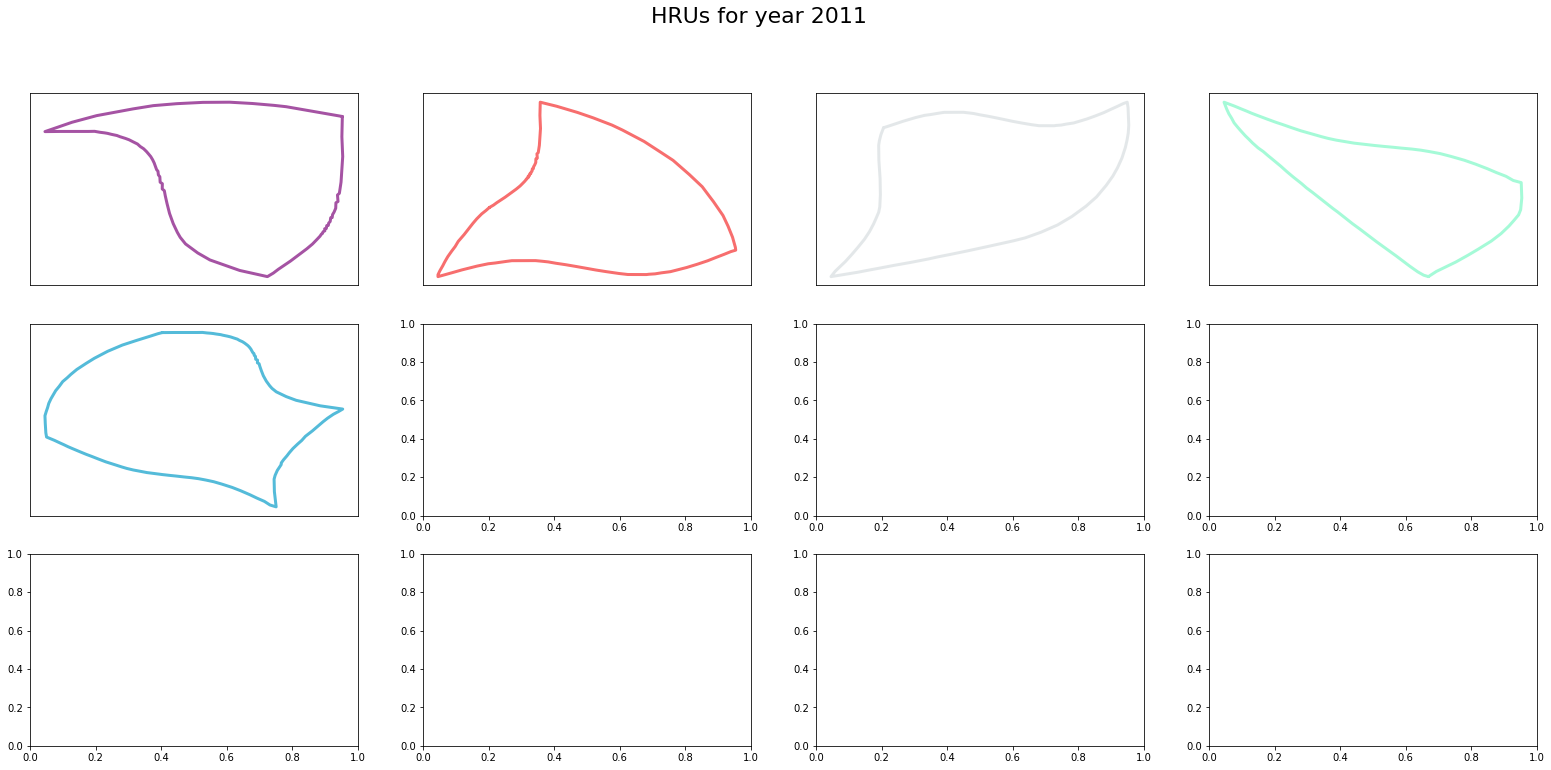

Checking validity of landuse shapefile


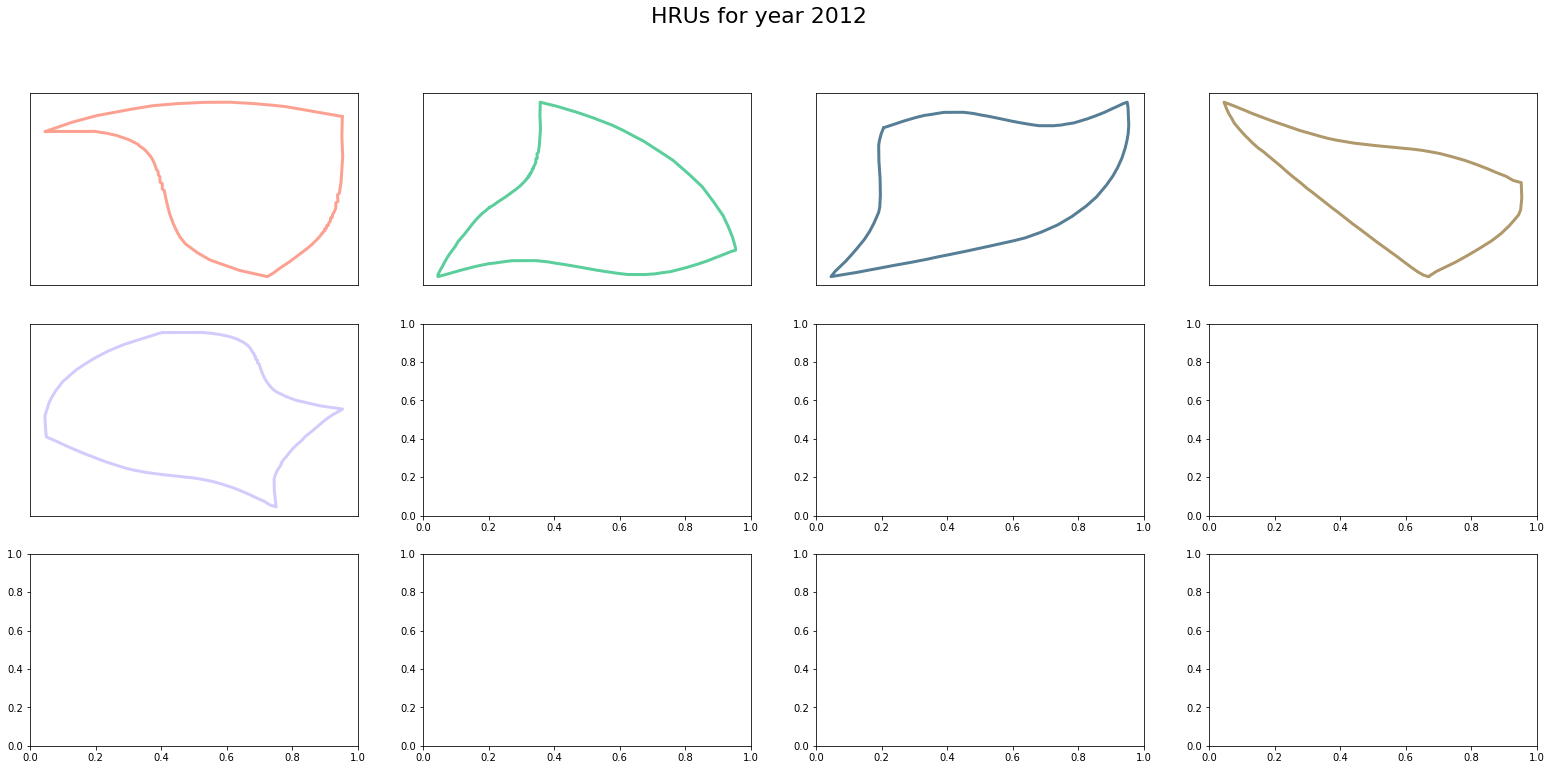

Checking validity of landuse shapefile


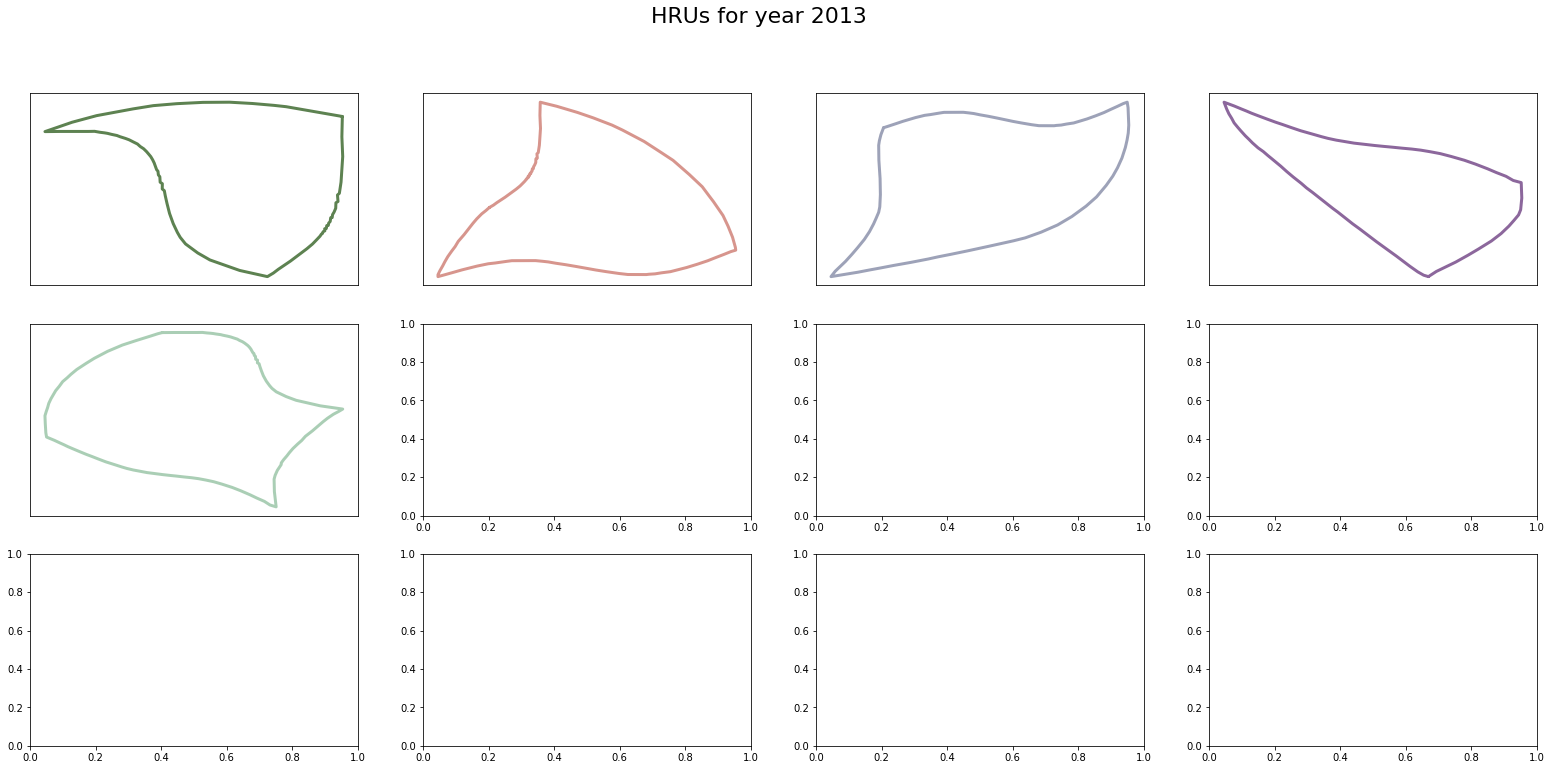

Checking validity of landuse shapefile


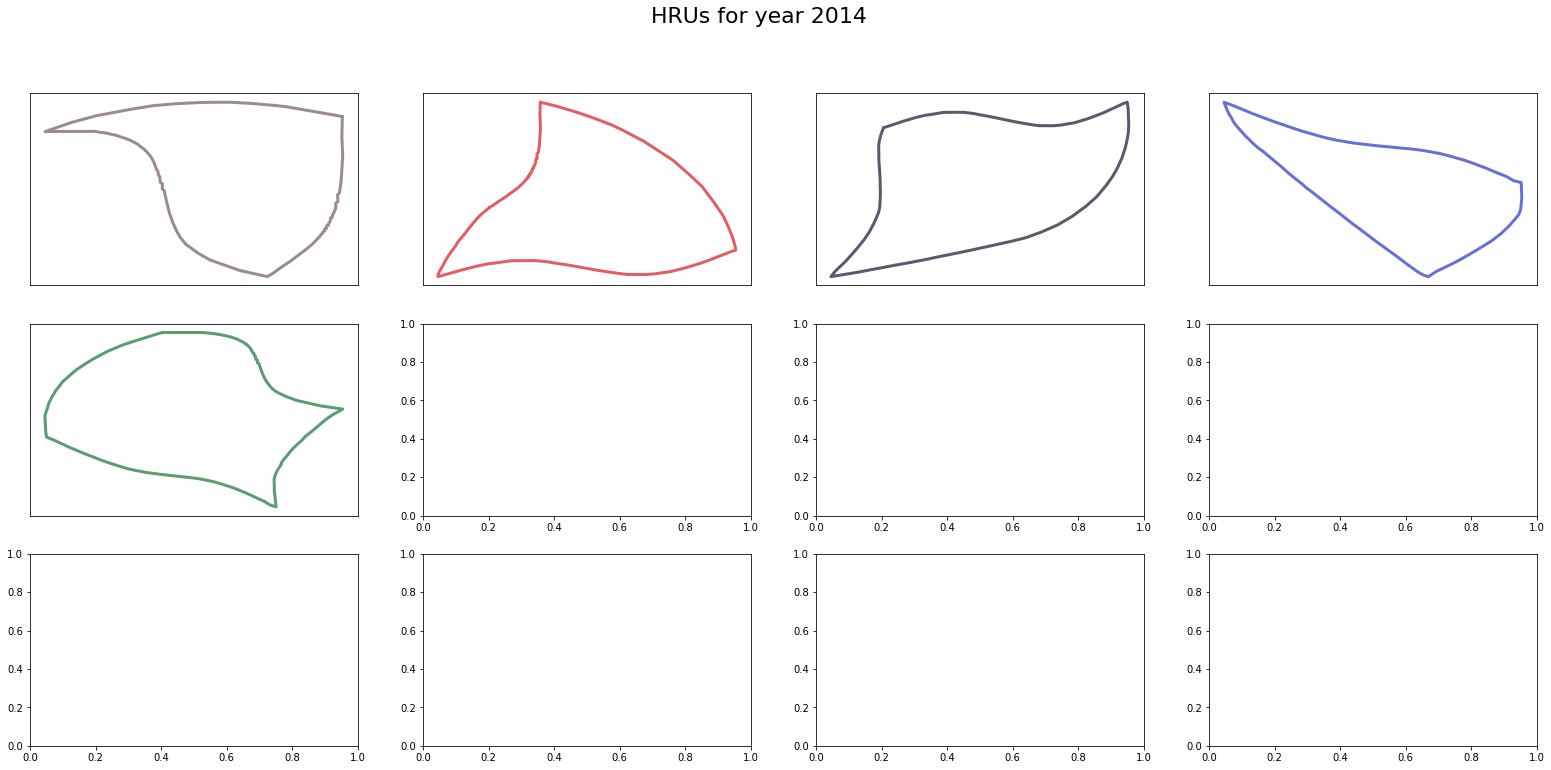

In [8]:
hru_object = MakeHRUs('unique_sub',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      subbasins_shape={'shapefile': SubBasin_shp, 'feature': 'id'}, 
                     )

hru_object.call(plot_hrus=True)


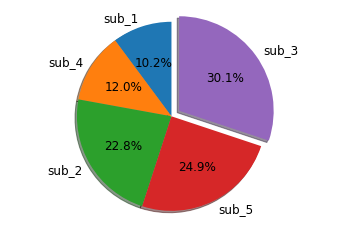

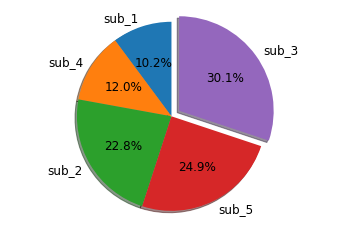

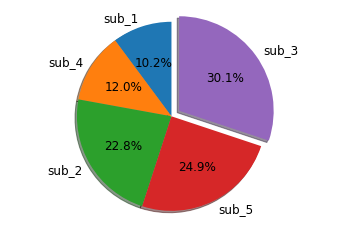

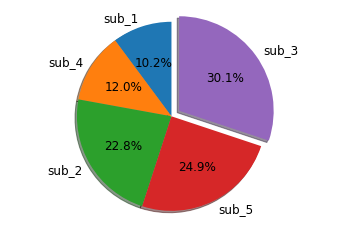

In [9]:
for yr in years:
    hru_object.draw_pie(yr, title=False, n_merge=0, save=True, textprops={'fontsize': '12'})


/content/AI4Water/AI4Water/utils/spatial_processing.py:431: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



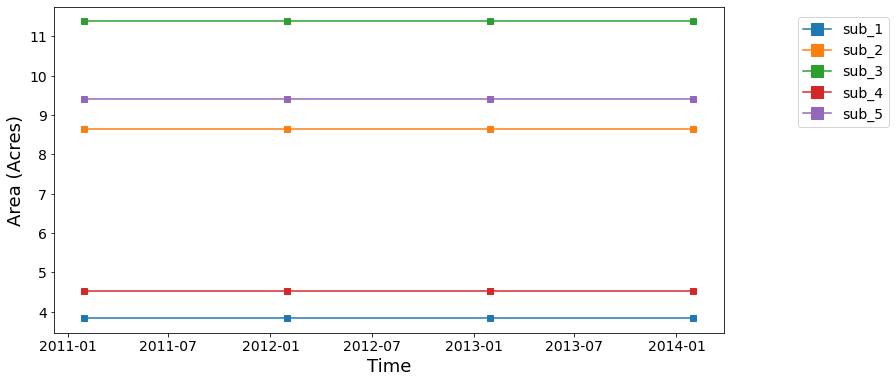

In [10]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)


### `unique_soil`

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


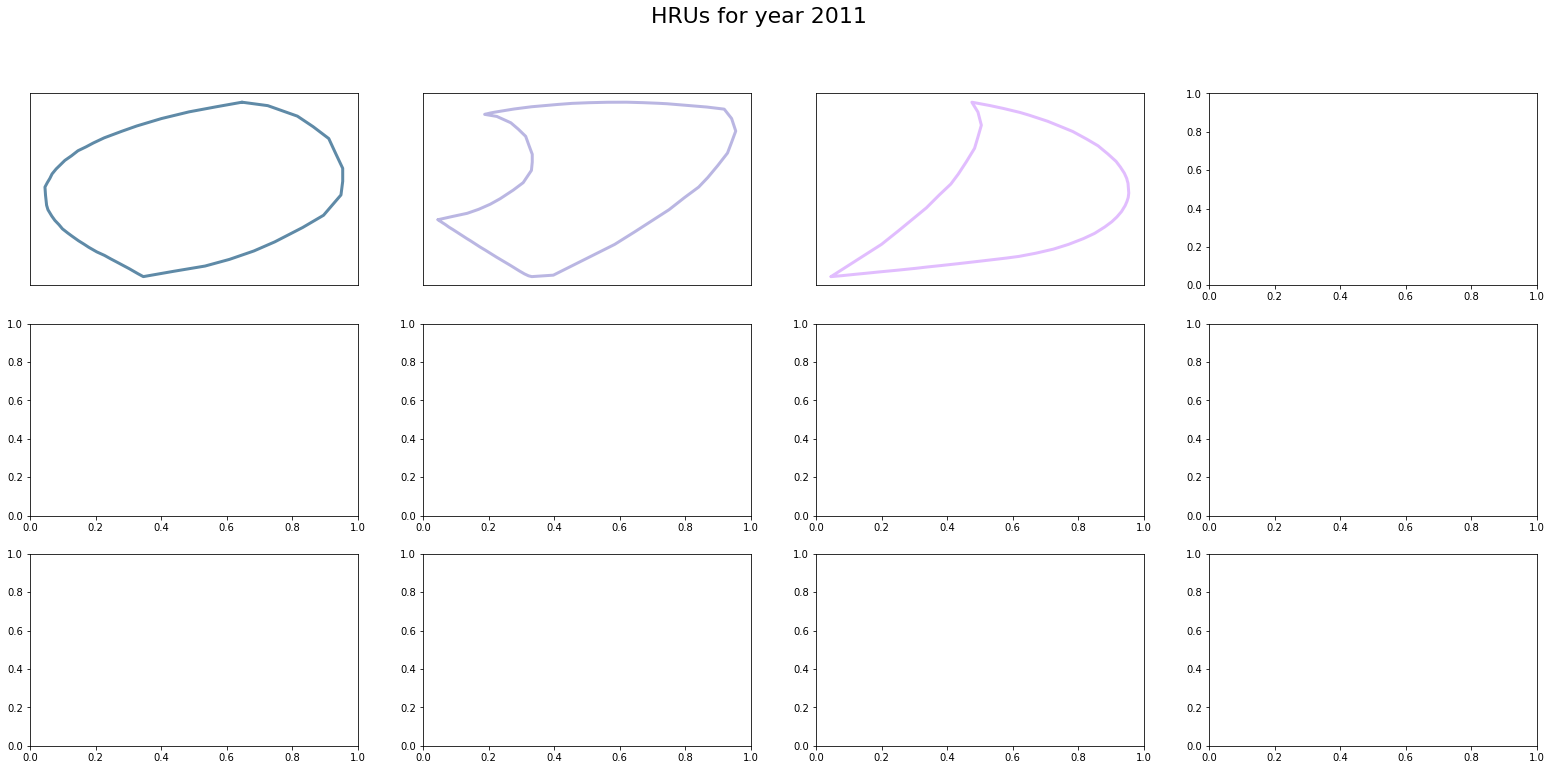

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


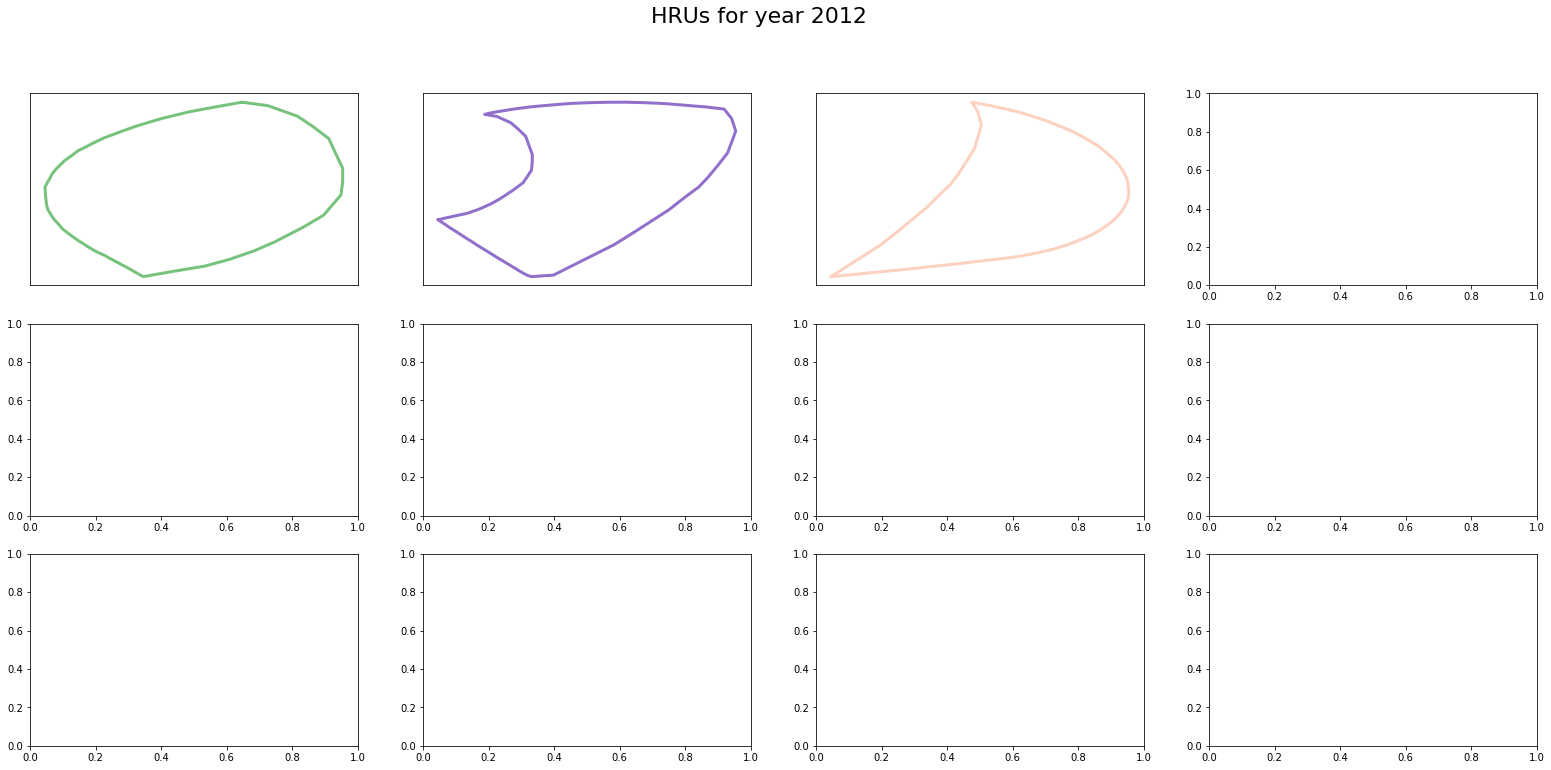

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


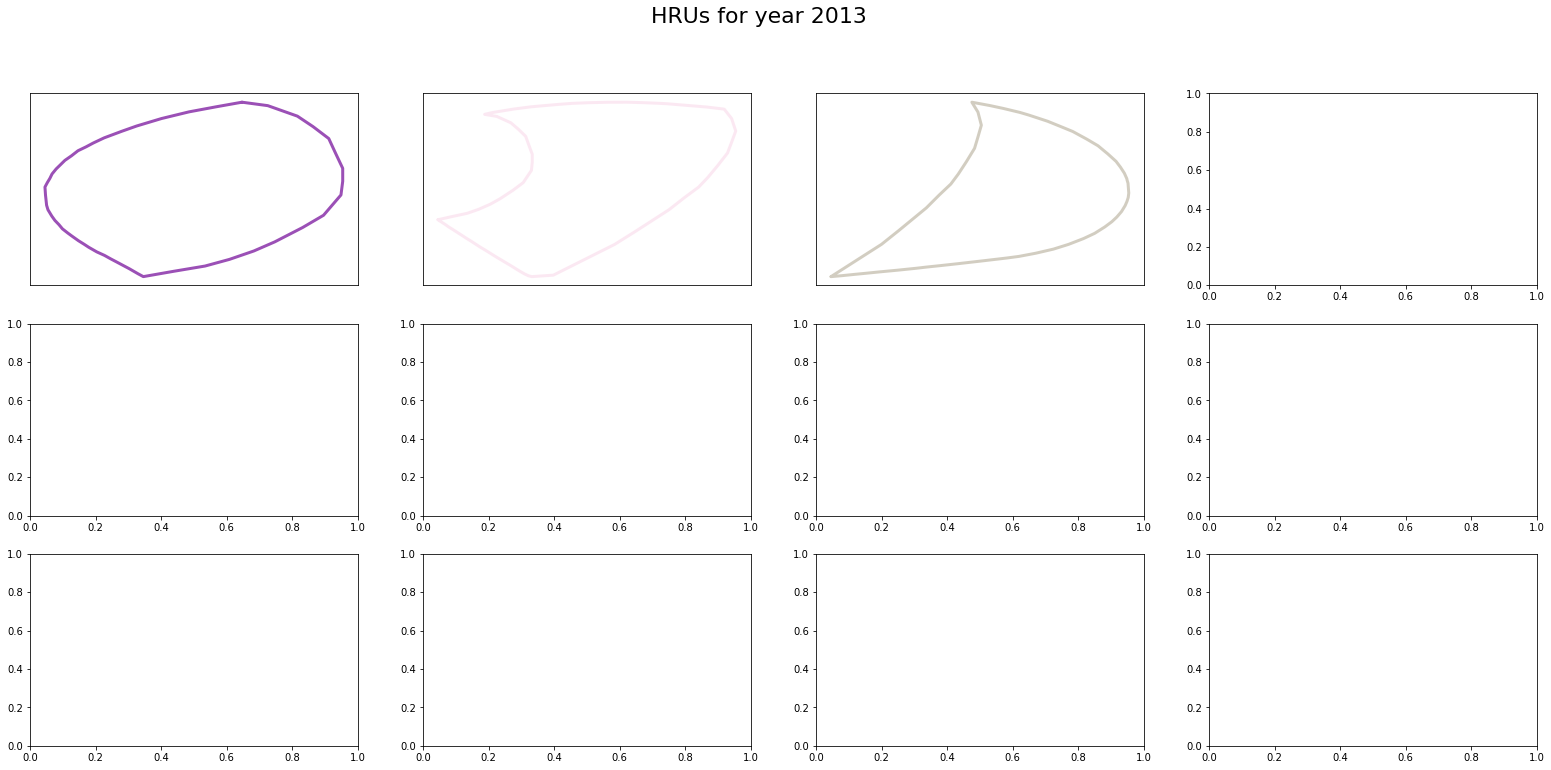

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


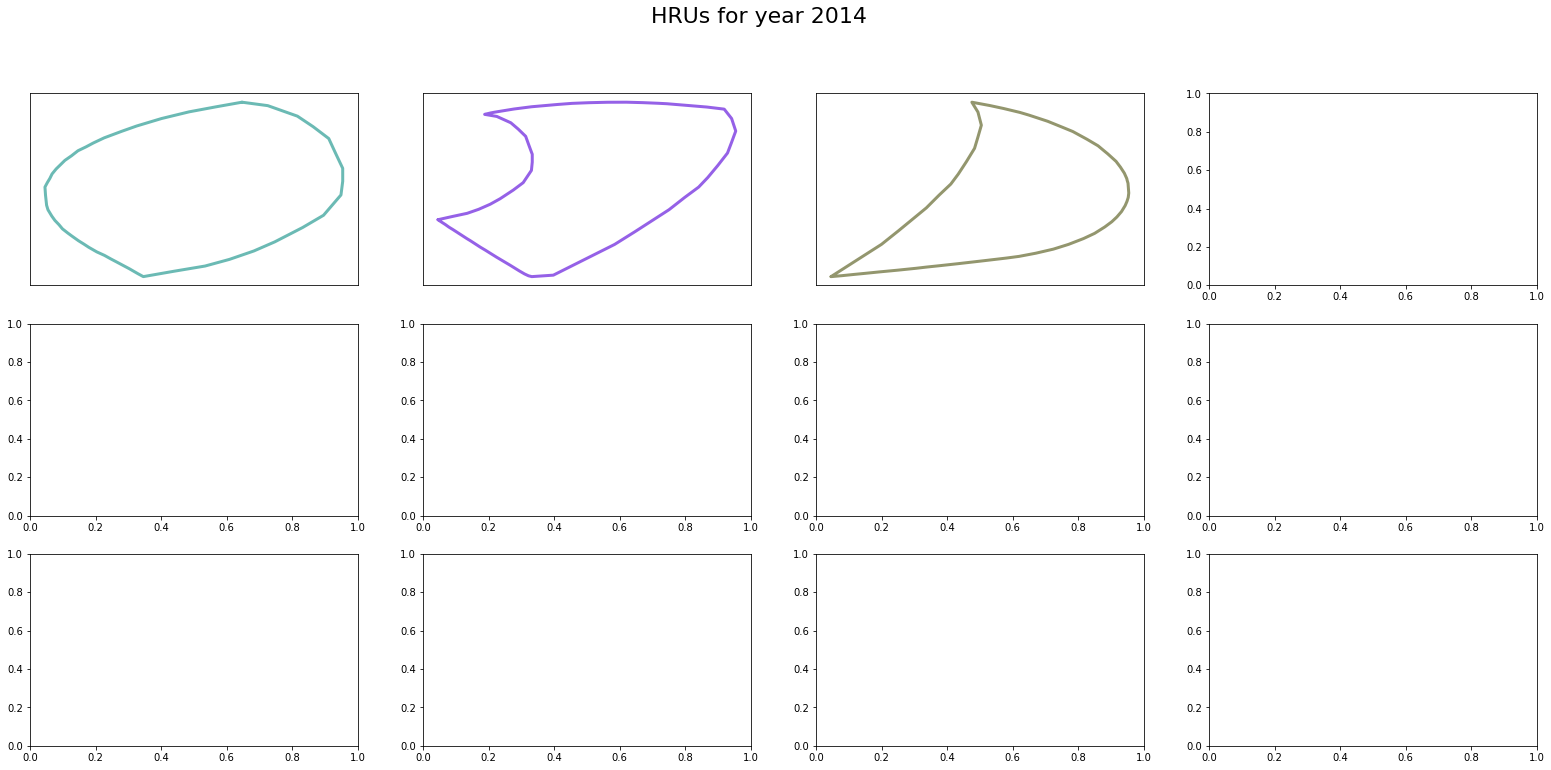

In [11]:
hru_object = MakeHRUs('unique_soil',
                      index={2011: None, 2012: None, 2013:None, 2014:None}, 
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'}
                     )

hru_object.call(plot_hrus=True)

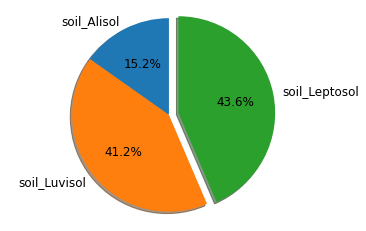

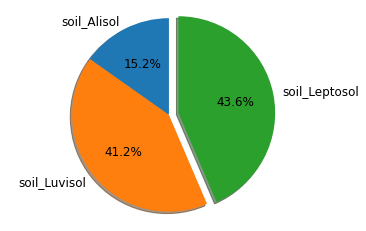

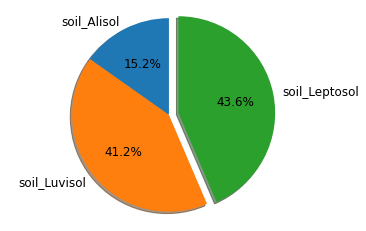

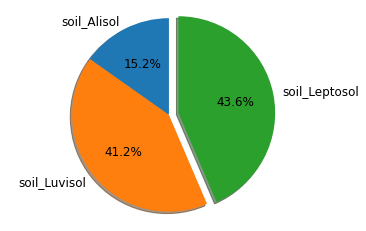

In [12]:
for yr in years:
    hru_object.draw_pie(yr, title=False, save=True, textprops={'fontsize': '12'})

/content/AI4Water/AI4Water/utils/spatial_processing.py:431: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



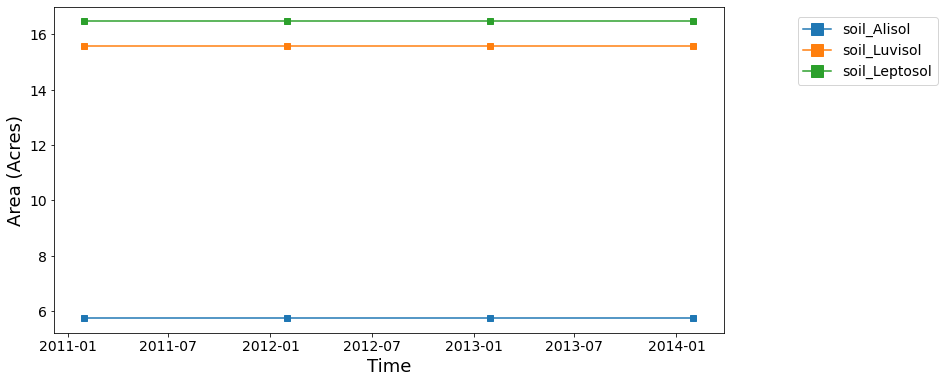

In [13]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_lu`
Since the land use varies with time, we will include it in index.

Checking validity of landuse shapefile
lu 0 is valid now
lu 1 is valid now
lu 2 is valid now
lu 3 is valid now


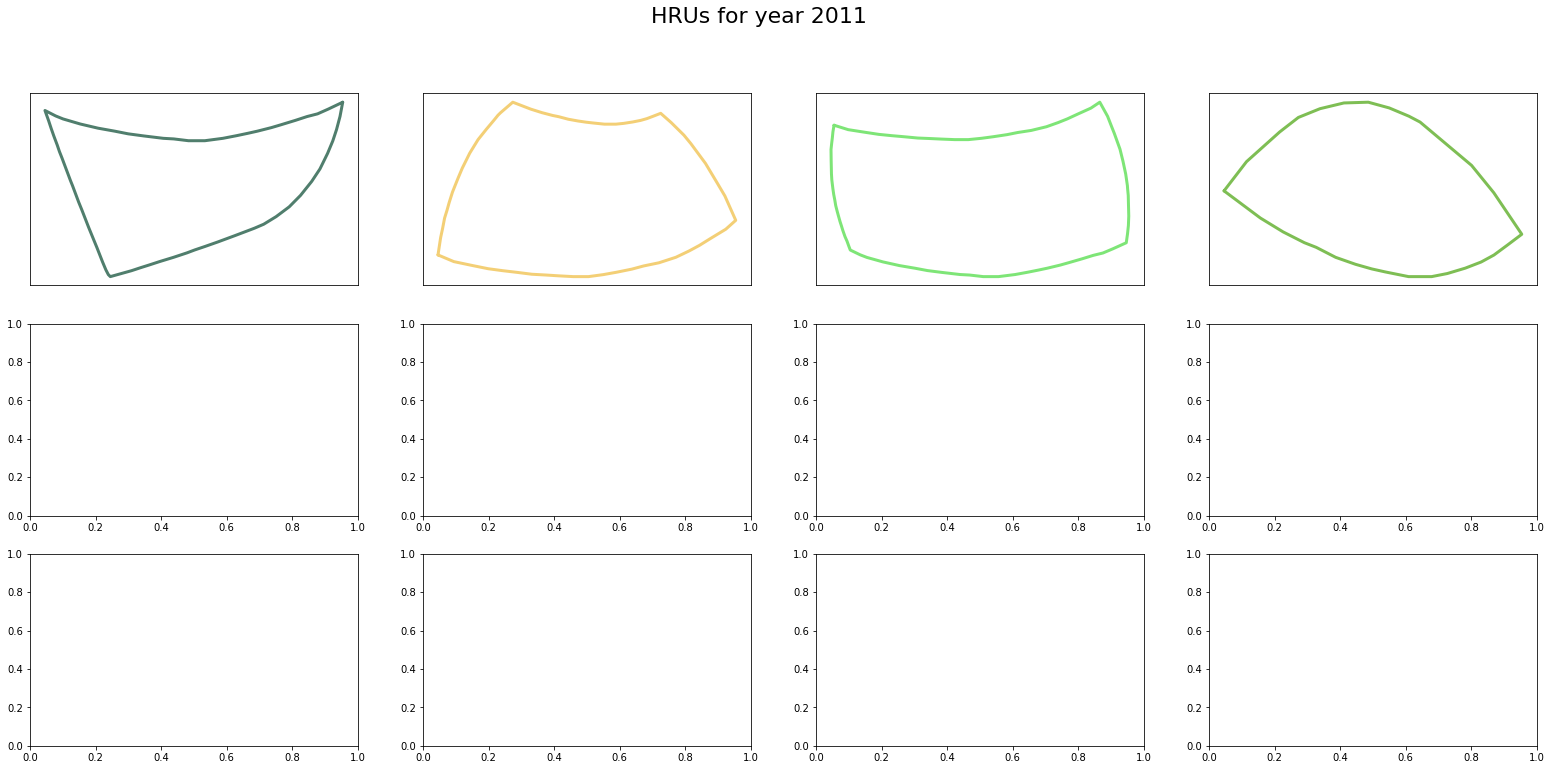

Checking validity of landuse shapefile
lu 0 is valid now
lu 1 is valid now
lu 2 is valid now
lu 3 is valid now


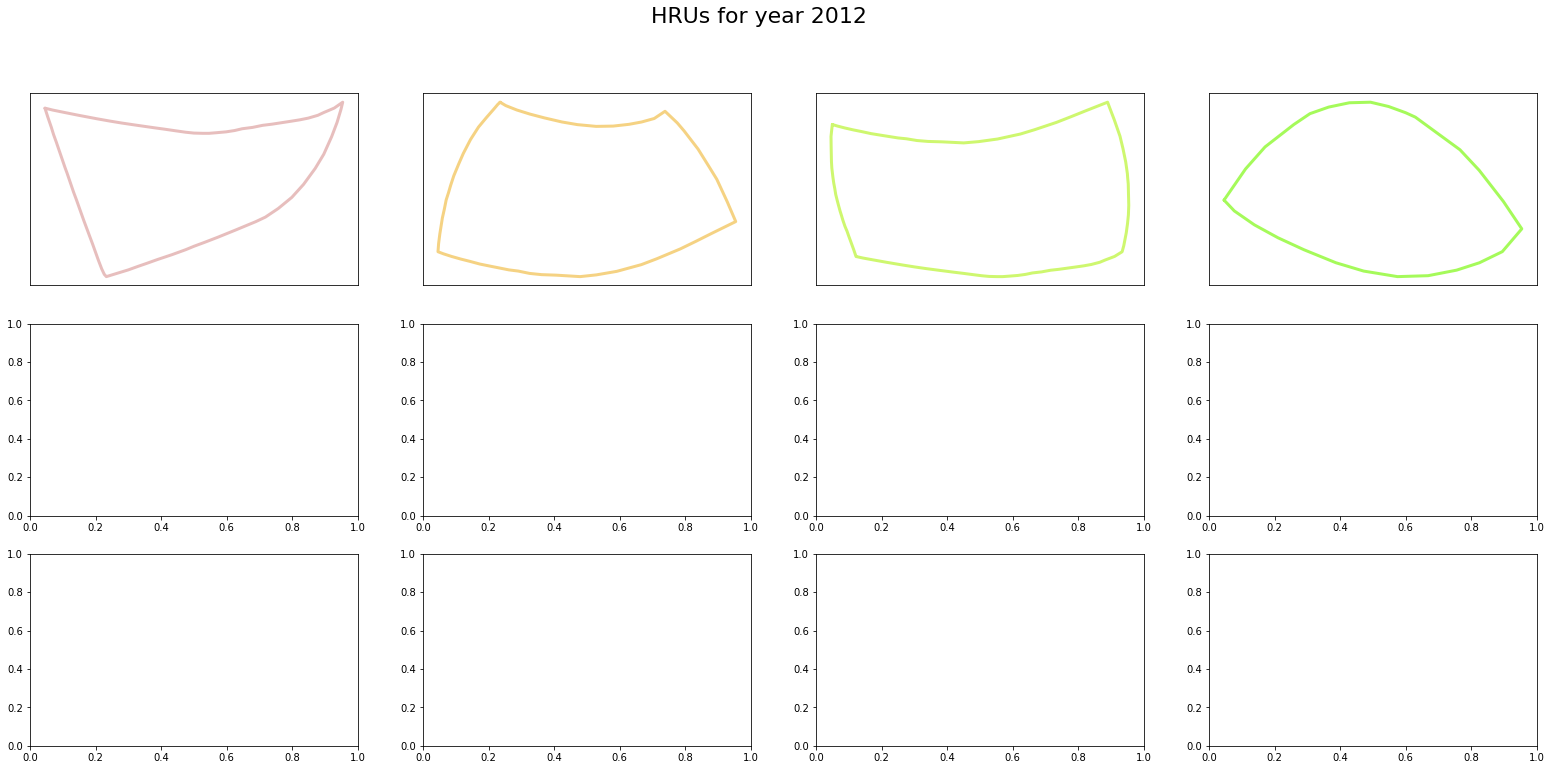

Checking validity of landuse shapefile
lu 0 is valid now
lu 1 is valid now
lu 2 is valid now
lu 3 is valid now


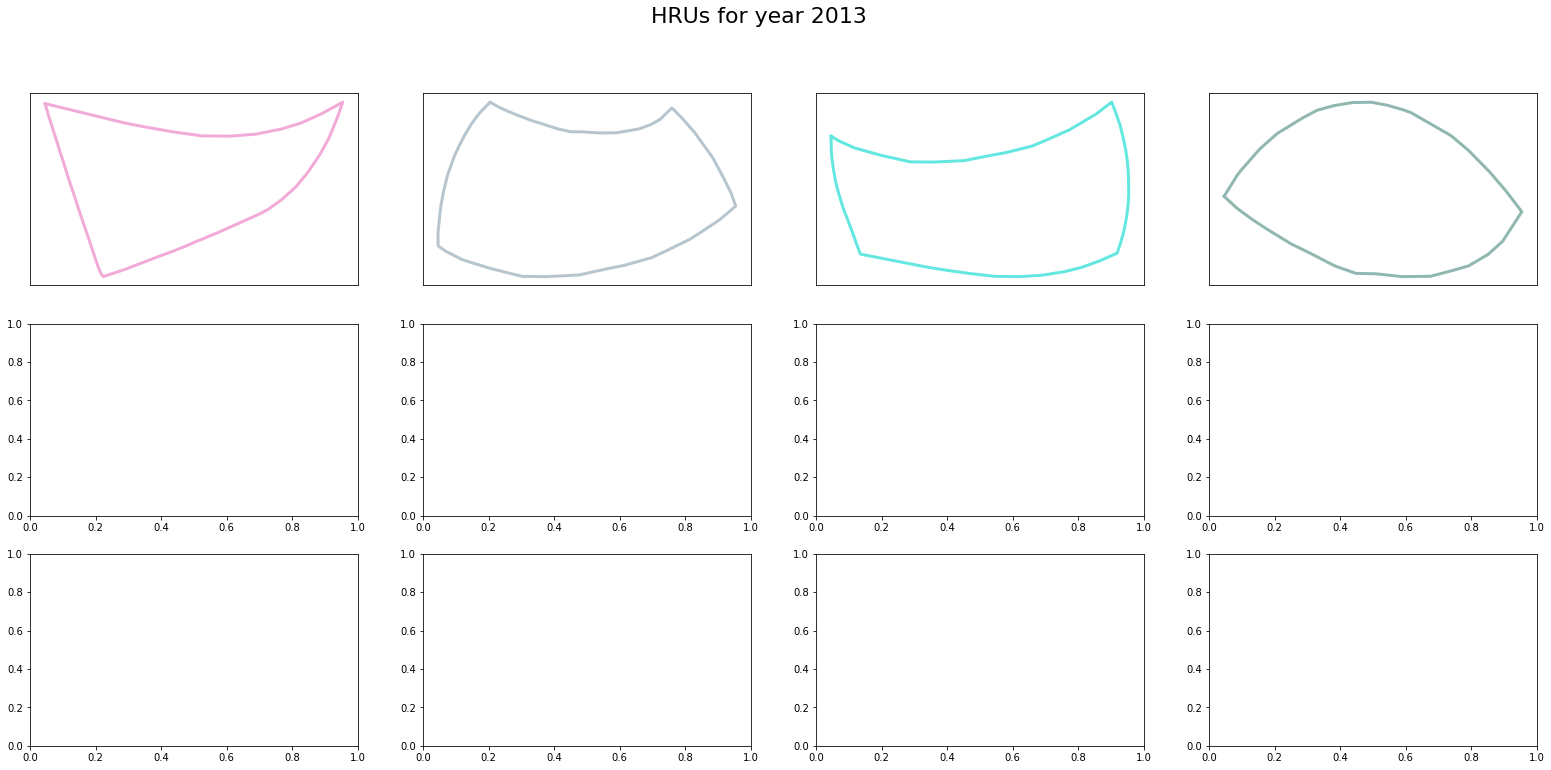

Checking validity of landuse shapefile
lu 0 is valid now
lu 1 is valid now
lu 2 is valid now
lu 3 is valid now


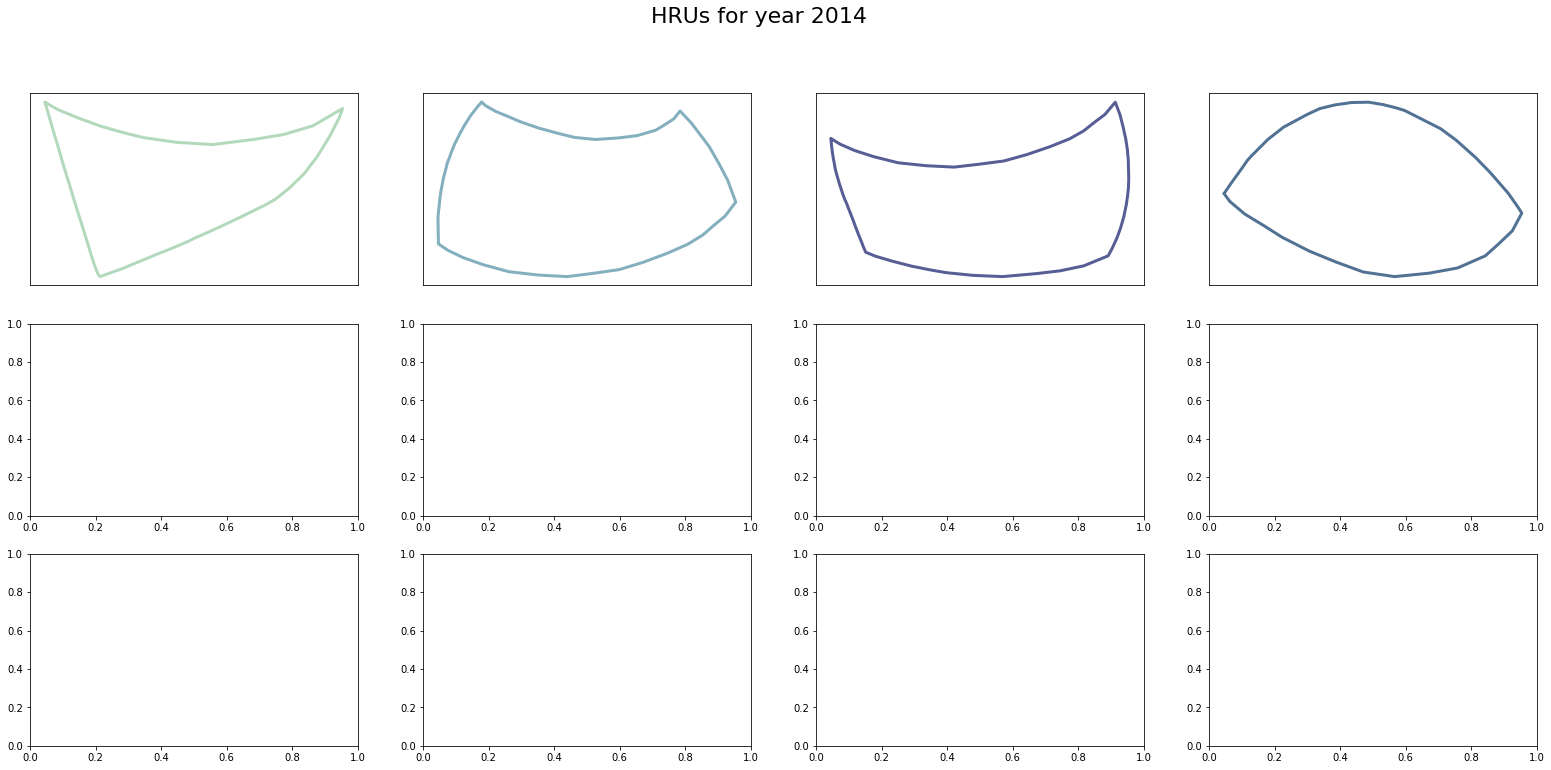

In [14]:
hru_object = MakeHRUs('unique_lu',
                      index=years,
                     )

hru_object.call(plot_hrus=True)

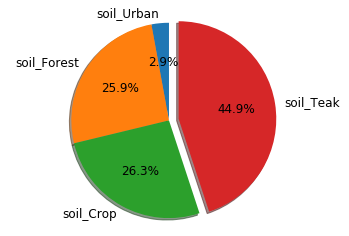

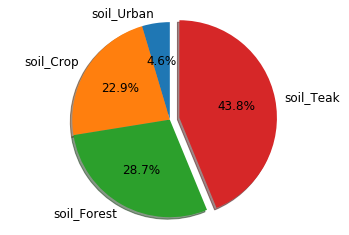

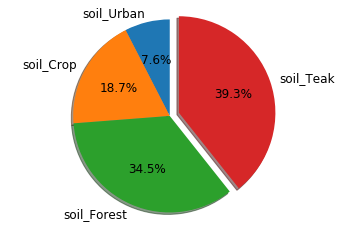

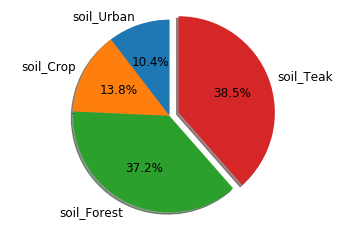

In [ ]:
for yr in years:
    hru_object.draw_pie(yr, title=False, save=True, textprops={'fontsize': '12'})

/content/AI4Water/AI4Water/utils/spatial_processing.py:431: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



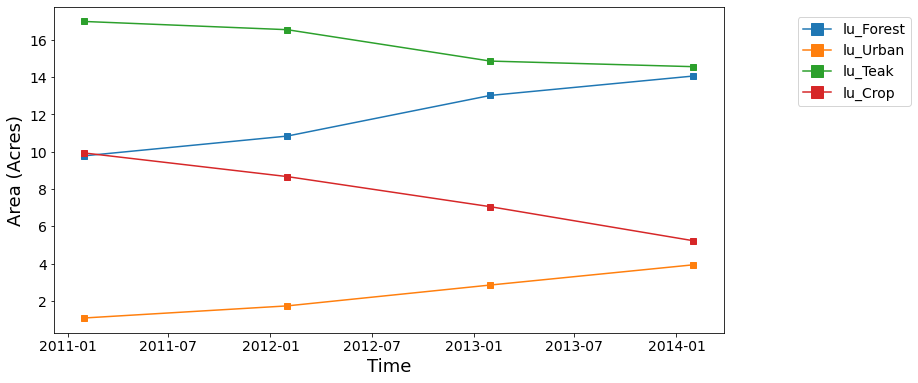

In [15]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_slope`

Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now


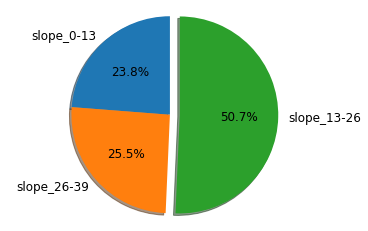

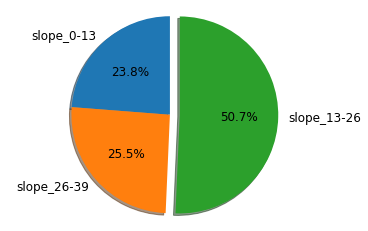

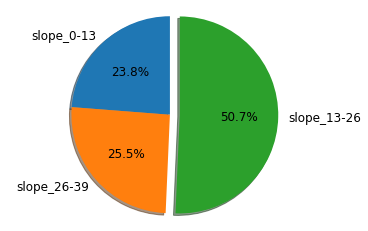

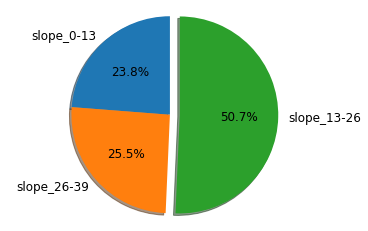

In [16]:
hru_object = MakeHRUs('unique_slope',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'}
                     )

hru_object.call(plot_hrus=False)
for yr in years:
    hru_object.draw_pie(yr, title=False, save=True, textprops={'fontsize': '12'})

/content/AI4Water/AI4Water/utils/spatial_processing.py:431: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



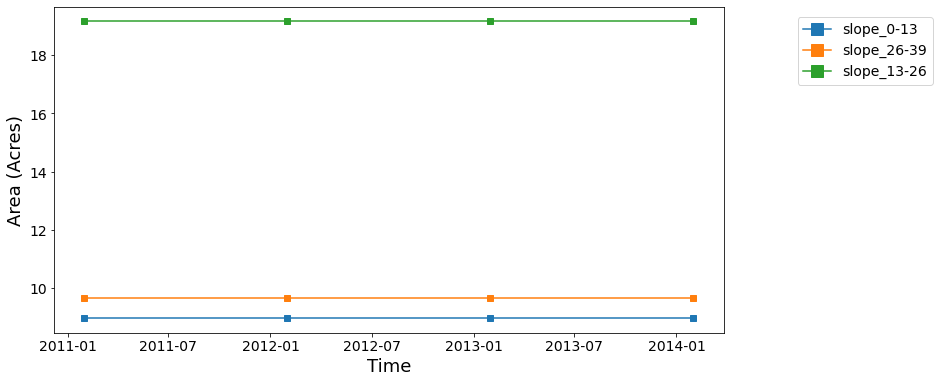

In [17]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_lu_sub`

In [19]:
hru_object = MakeHRUs('unique_lu_sub',
                      index=years,
                      subbasins_shape={'shapefile': SubBasin_shp, 'feature': 'id'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile


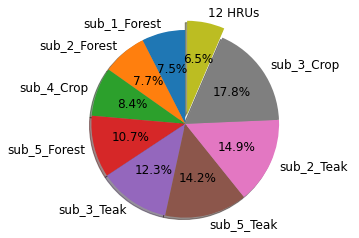

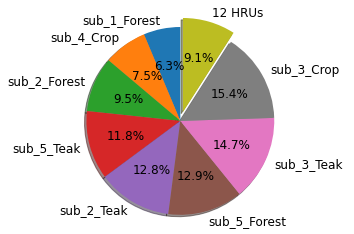

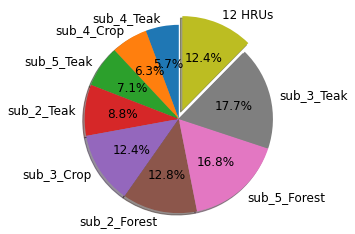

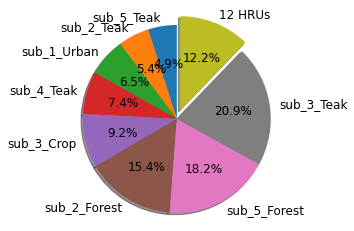

In [20]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=12, title=False, save=True, textprops={'fontsize': '12'})

/content/AI4Water/AI4Water/utils/spatial_processing.py:431: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



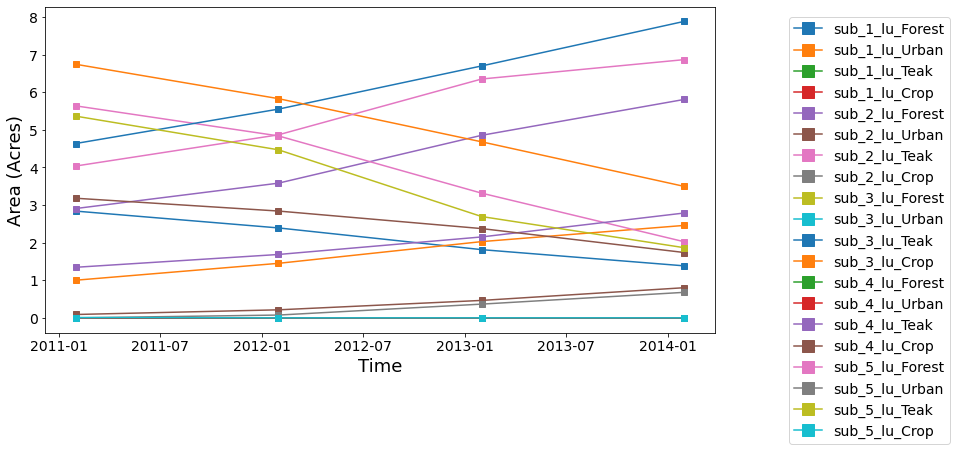

In [21]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_lu_soil`
combination of land use and soil

In [23]:
hru_object = MakeHRUs('unique_lu_soil',
                      index=years,
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


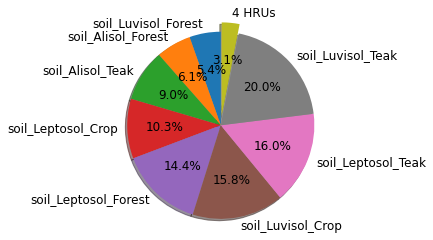

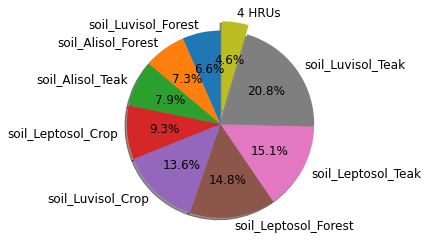

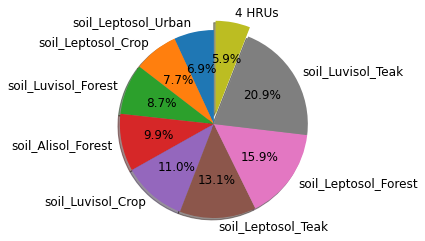

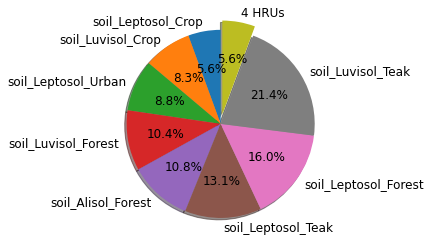

In [24]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=4, title=False, save=True, textprops={'fontsize': '12'})

/content/AI4Water/AI4Water/utils/spatial_processing.py:431: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



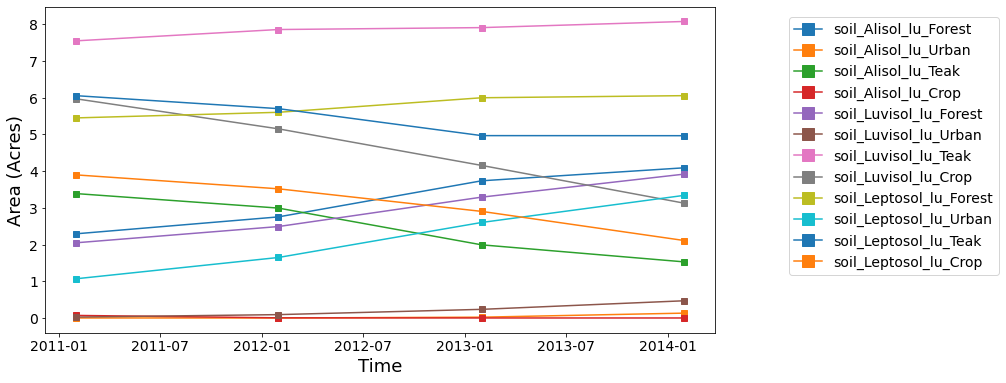

In [25]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_lu_slope`

In [26]:
hru_object = MakeHRUs('unique_lu_slope',
                      index=years,
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now


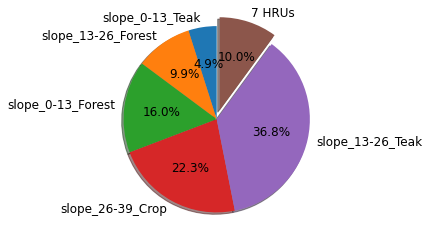

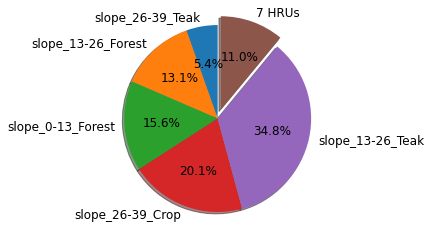

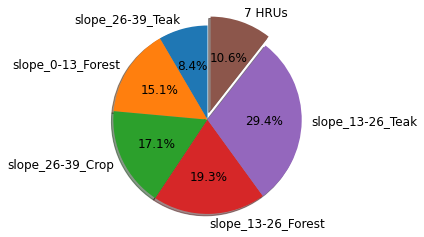

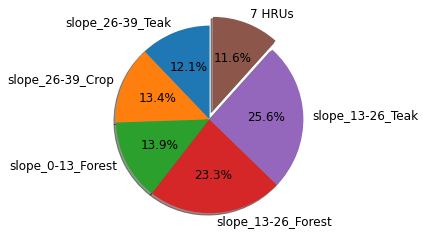

In [27]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=7, title=False, save=True, textprops={'fontsize': '12'})

/content/AI4Water/AI4Water/utils/spatial_processing.py:431: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



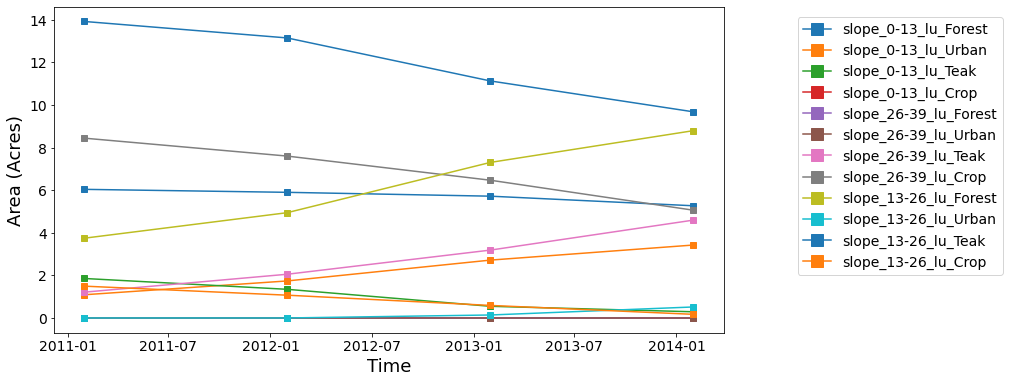

In [28]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_soil_sub`
combination of soil type and sub-basin

In [30]:
hru_object = MakeHRUs('unique_soil_sub',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      subbasins_shape={'shapefile': SubBasin_shp, 'feature': 'id'},
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile


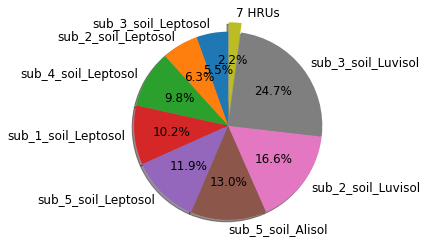

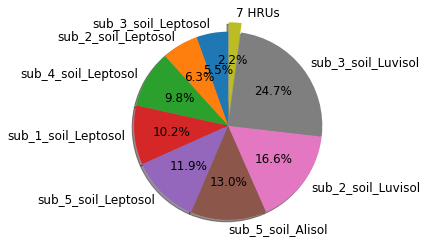

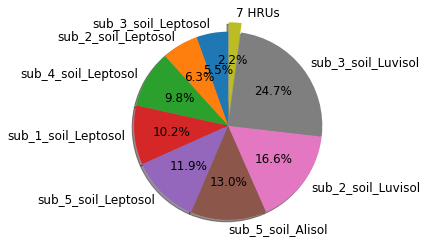

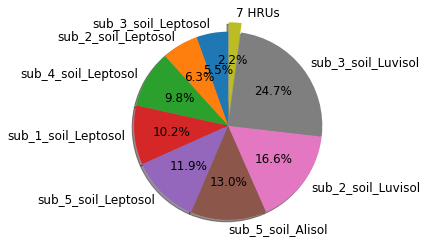

In [31]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=7, title=False, save=True, textprops={'fontsize': '12'})

/content/AI4Water/AI4Water/utils/spatial_processing.py:431: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



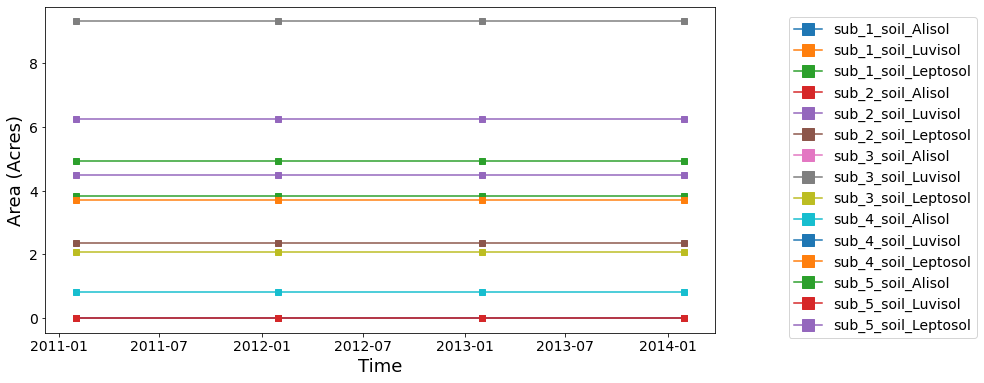

In [32]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_soil_slope`
combination of soil types and slope categories

In [33]:
hru_object = MakeHRUs('unique_soil_slope',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'},
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now


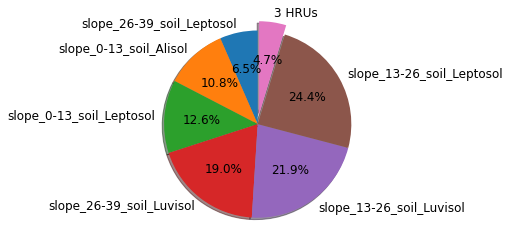

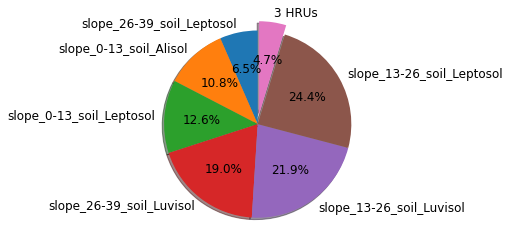

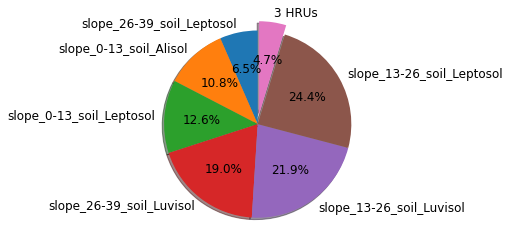

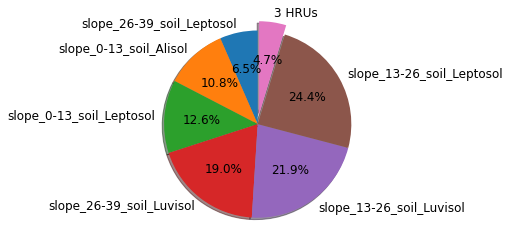

In [34]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=3, title=False, save=True, textprops={'fontsize': '12'})

/content/AI4Water/AI4Water/utils/spatial_processing.py:431: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



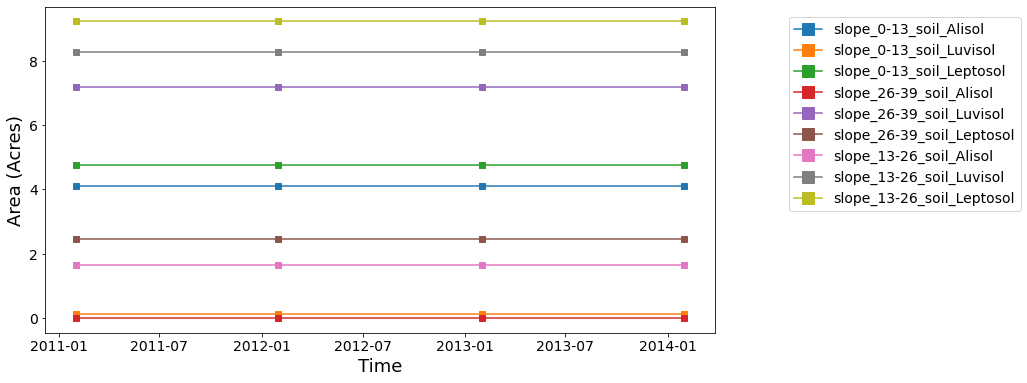

In [35]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_slope_sub`
combination of slope categories and sub-basins

In [36]:
hru_object = MakeHRUs('unique_slope_sub',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'},
                      subbasins_shape={'shapefile': SubBasin_shp, 'feature': 'id'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile


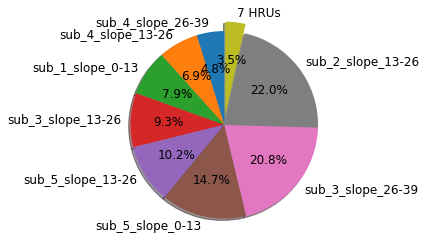

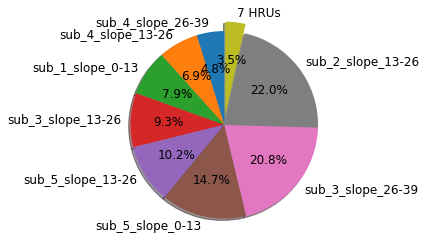

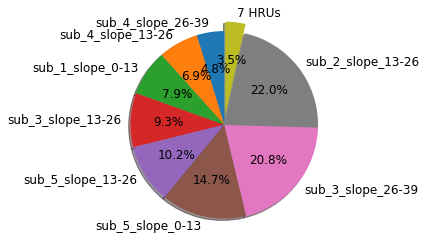

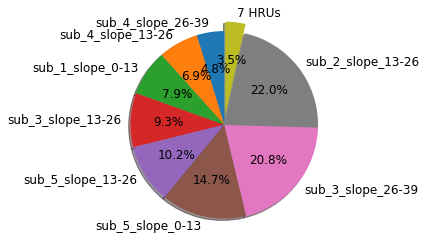

In [37]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=7, title=False, save=True, textprops={'fontsize': '12'})

/content/AI4Water/AI4Water/utils/spatial_processing.py:431: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



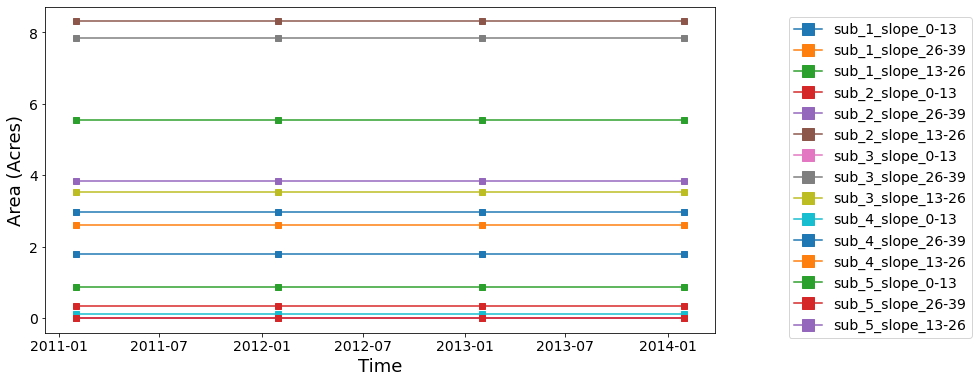

In [38]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_lu_soil_slope`
combination of land use, soil and slope.

In [39]:
hru_object = MakeHRUs('unique_lu_soil_slope',
                      index=years,
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'},
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'},
                     )

hru_object.call(False)

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


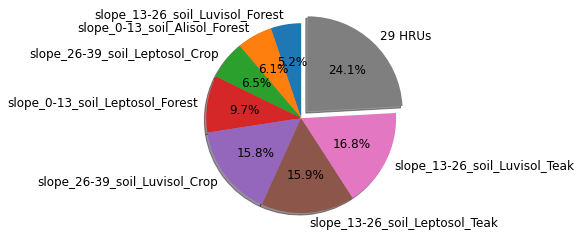

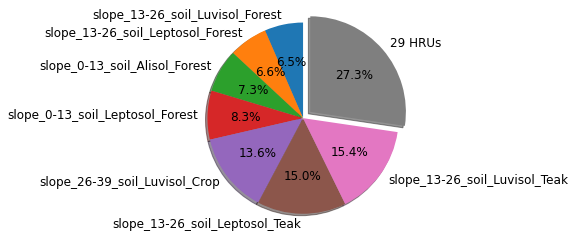

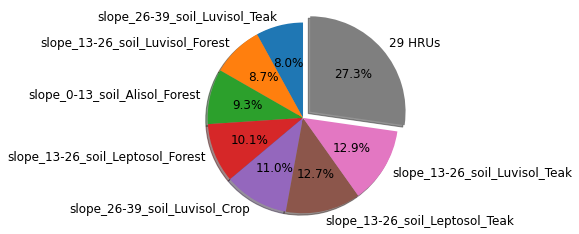

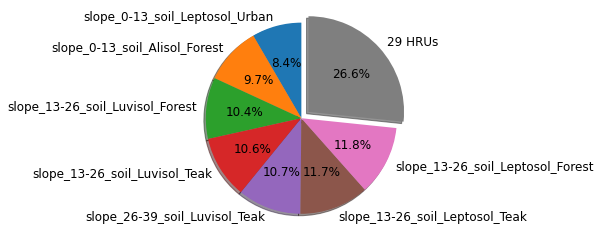

In [40]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=29, title=False, save=True, textprops={'fontsize': '12'})

/content/AI4Water/AI4Water/utils/spatial_processing.py:431: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:179: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



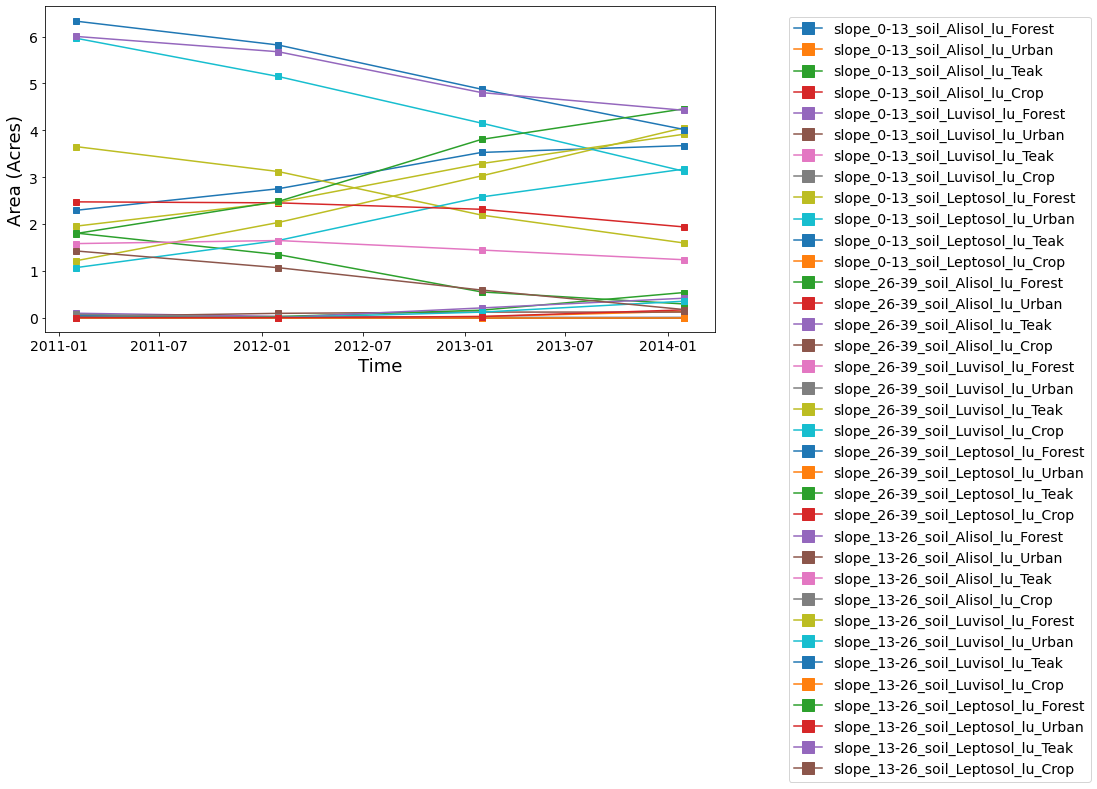

In [41]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)